# 🚀 Machine Learning Reboot Challenge 🚀

Get ready to apply your knowledge in a hands-on experience with Airbnb data.

We'll work through:

🧹 Data Cleaning

🚦 Train-Test Split

👷 Preprocessing the proper way with pipelines

📈 Linear Regression 

🔁 Cross-Validation

🎯 Fine-Tuning

Let's dive in and bring these concepts to life! 🏊‍♀️🏊‍♂️

## 1. Understand the data 👏 and basic cleaning 🧹

In this challenge, we will use real Airbnb data. This data comes from many cities. We'll want to make our code easy to reuse. This way, we can work with different CSV files quickly, because we won't need to write new code for each csv!

### Loading the data

First up: ***Asheville, North Carolina***. The CSV file is available here: [🔗 link 🔗](https://wagon-public-datasets.s3.amazonaws.com/data-science-images/05-ML/Reboot-2/asheville_airbnb.csv).

We're going to use a linear regression to predict the price of an Airbnb accomodation based on all the information we have about it!

👉 First, let's load the CSV file into a DataFrame called `df`.
<br><br>
<details><summary><i>💡  Hint</i></summary>

The first (unnamed) column in the CSV is actually an index column. That's the index that Pandas is creating by default, but it's not so helpful when we already have one!
    
To get rid of it, either use the `.reset_index()` method, or - **easier!** - use `index_col=0` when reading the CSV file.

Think about what index_col=0 is doing. Could we use `index_col` if our existing index was in the 3rd column?
</details>

In [671]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/data-science-images/05-ML/Reboot-2/asheville_airbnb.csv"

# Load the data into `df`
df = pd.read_csv(url, index_col=0)
df.sample(10)

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,availability_365,instant_bookable,id,listing_url,scrape_id,last_scraped,name,description
1546,28804,35.62630,-82.53124,Entire home,Entire home/apt,10,3 baths,4.0,7.0,$399.00,...,52,4.88,219,f,42011229,https://www.airbnb.com/rooms/42011229,20220611041116,2022-06-11,Asheville Town Mountain Hideaway 'Bear Pause',This fabulous home features 4BD/3BA with mount...
2679,28806,35.59655,-82.61408,Entire home,Entire home/apt,4,2 baths,2.0,2.0,$155.00,...,1,5.00,17,t,589433394326017534,https://www.airbnb.com/rooms/589433394326017534,20220611041116,2022-06-11,West Avl Mid/Mod Gem with blooming backyard!,"Kick back and relax in this calm, stylish spac..."
1692,28801,35.58540,-82.55119,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$60.00,...,75,4.88,17,t,44597185,https://www.airbnb.com/rooms/44597185,20220611041116,2022-06-11,Downtown Gorgeous Garden Homestay: Private Room,PLEASE READ ALL DETAILS BEFORE BOOKING! This i...
780,28806,35.57724,-82.60613,Private room in home,Private room,2,1 private bath,1.0,1.0,$65.00,...,49,4.80,0,t,24327916,https://www.airbnb.com/rooms/24327916,20220611041116,2022-06-11,"Comfy, Cozy Mountain Getaway",A master king with a private master bath tucke...
2095,28806,35.57057,-82.58933,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,$76.00,...,110,4.89,32,t,49900559,https://www.airbnb.com/rooms/49900559,20220611041116,2022-06-11,Clean & cozy basement apartment in West Asheville,"Located near the heart of West Asheville, our ..."
2322,28806,35.58088,-82.59062,Entire home,Entire home/apt,5,1.5 baths,3.0,3.0,$165.00,...,5,5.00,85,f,52492240,https://www.airbnb.com/rooms/52492240,20220611041116,2022-06-11,"Walkable West AVL Bungalow, 5 mins to downtown!","This is a fun, friendly, and convenient neighb..."
186,28804,35.63113,-82.57205,Private room in home,Private room,2,1 shared bath,1.0,1.0,$89.00,...,140,4.72,161,t,8085716,https://www.airbnb.com/rooms/8085716,20220611041116,2022-06-11,Country Living in the City Limits,I live in a 1939 Cape Cod home near 67 acre Be...
90,28803,35.54661,-82.49240,Entire cabin,Entire home/apt,2,1 bath,1.0,1.0,$126.00,...,268,4.94,285,t,3590634,https://www.airbnb.com/rooms/3590634,20220611041116,2022-06-11,Cozy Cottage by a Little Mountain Stream and Pond,"10 minutes from downtown and Biltmore Estate, ..."
1715,28806,35.59755,-82.61599,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$100.00,...,29,4.86,0,f,45100465,https://www.airbnb.com/rooms/45100465,20220611041116,2022-06-11,"""ARTISH"" ... VERY Modern, Zen, Five Star Apart...","You will be staying in a peaceful, quiet and l..."
1156,28806,35.61729,-82.58158,Entire home,Entire home/apt,7,2 baths,3.0,3.0,$119.00,...,113,4.94,254,f,33663157,https://www.airbnb.com/rooms/33663157,20220611041116,2022-06-11,Forest Oasis King & Queen Beds 10 min to down...,Entire home conveniently located less than 10 ...


In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 2855
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  2856 non-null   int64  
 1   latitude                2856 non-null   float64
 2   longitude               2856 non-null   float64
 3   property_type           2856 non-null   object 
 4   room_type               2856 non-null   object 
 5   accommodates            2856 non-null   int64  
 6   bathrooms_text          2855 non-null   object 
 7   bedrooms                2693 non-null   float64
 8   beds                    2825 non-null   float64
 9   price                   2856 non-null   object 
 10  minimum_nights          2856 non-null   int64  
 11  number_of_reviews       2856 non-null   int64  
 12  review_scores_rating    2672 non-null   float64
 13  availability_365        2856 non-null   int64  
 14  instant_bookable        2856 non-null   

👉 Investigate the dtypes of your DataFrame. Something is wrong. Do you see it?
<br><br>
<details><summary><i>💡  Solution</i></summary>

The `price` column is an object, not a float.

</details>

👉 Clean the column you identified.
<br><br>
<details><summary><i>💡  Hint</i></summary>

You'll need the [`.str.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) and the [`.astype()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html) methods. 
</details>


In [673]:
df['price'] = df['price'].str.replace('$', '', regex=True)

In [674]:
df['price'] = df['price'].str.replace(',', '', regex=True)

In [675]:
df['price'] = df['price'].astype(float)
df.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,availability_365,instant_bookable,id,listing_url,scrape_id,last_scraped,name,description
0,28801,35.60670,-82.55563,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,120.0,...,90,4.50,285,f,108061,https://www.airbnb.com/rooms/108061,20220611041116,2022-06-11,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...
1,28806,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,100.0,...,359,4.58,179,t,155305,https://www.airbnb.com/rooms/155305,20220611041116,2022-06-11,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Private cottage located ...
2,28806,35.57864,-82.59578,Private room in home,Private room,2,2.5 shared baths,1.0,1.0,66.0,...,67,4.52,0,t,156805,https://www.airbnb.com/rooms/156805,20220611041116,2022-06-11,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...
3,28806,35.57864,-82.59578,Shared room in hostel,Shared room,1,2.5 shared baths,1.0,6.0,33.0,...,306,4.71,199,t,156926,https://www.airbnb.com/rooms/156926,20220611041116,2022-06-11,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...
4,28806,35.57808,-82.63689,Private room in home,Private room,2,1 private bath,1.0,1.0,45.0,...,51,4.98,78,f,197263,https://www.airbnb.com/rooms/197263,20220611041116,2022-06-11,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ..."


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2856 entries, 0 to 2855
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  2856 non-null   int64  
 1   latitude                2856 non-null   float64
 2   longitude               2856 non-null   float64
 3   property_type           2856 non-null   object 
 4   room_type               2856 non-null   object 
 5   accommodates            2856 non-null   int64  
 6   bathrooms_text          2855 non-null   object 
 7   bedrooms                2693 non-null   float64
 8   beds                    2825 non-null   float64
 9   price                   2856 non-null   float64
 10  minimum_nights          2856 non-null   int64  
 11  number_of_reviews       2856 non-null   int64  
 12  review_scores_rating    2672 non-null   float64
 13  availability_365        2856 non-null   int64  
 14  instant_bookable        2856 non-null   

#### Check your code

In [677]:
from nbresult import ChallengeResult

result = ChallengeResult('df',
    df_columns=df.columns,
    price_dtype=df['price'].dtype
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_df.py::TestDf::test_df_has_no_double_index_column PASSED            [ 50%]
test_df.py::TestDf::test_price_has_the_right_dtype PASSED                [100%]

============================== 2 passed in 0.27s ===============================


💯 You can commit your code:

git add tests/df.pickle

git commit -m 'Completed df step'

git push origin master



### Target distribution

👉 Take a look at the distribution of the target. Also check out its minimum and maximum values.
<br><br>
<details><summary><i>💡  Hint</i></summary>

Use the `.hist()` method of a pd.Series. You can apply it to your target column. 
</details>


<AxesSubplot:>

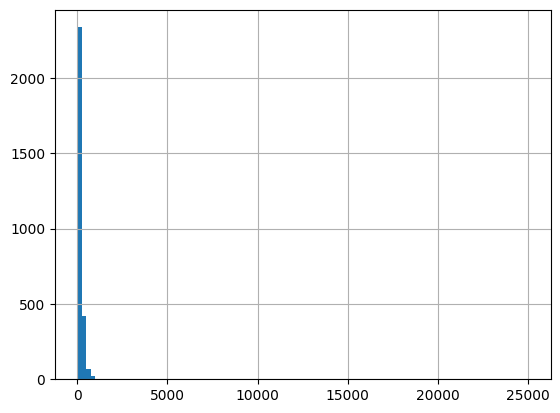

In [678]:
df['price'].hist(bins=100)

Looks quite skewed! We're going to focus on Airbnb listings priced between 50 and 1500 dollars (both included).

👉 Create a DataFrame named `reduced` with only listings priced between 50 and 1500.

In [679]:
df.describe()

,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,availability_365,id,scrape_id
count,2856.000000,2856.000000,2856.000000,2856.000000,2693.000000,2825.000000,2856.000000,2856.000000,2856.000000,2672.000000,2856.000000,2.856000e+03,2.856000e+03
mean,28792.328431,35.576612,-82.559247,4.495098,1.940958,2.481416,195.723739,5.510854,90.371849,4.881722,191.056022,6.353332e+16,2.022061e+13
std,30.626065,0.049873,0.048407,2.810658,1.159240,1.857653,491.389346,22.266195,116.958299,0.215251,117.824918,1.830445e+17,0.000000e+00
min,28704.000000,35.422810,-82.691050,1.000000,1.000000,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,1.080610e+05,2.022061e+13
25%,28801.000000,35.561725,-82.592940,2.000000,1.000000,1.000000,98.000000,1.000000,10.000000,4.850000,83.000000,2.305778e+07,2.022061e+13
50%,28804.000000,35.588060,-82.557545,4.000000,2.000000,2.000000,140.000000,2.000000,49.000000,4.930000,186.500000,3.896524e+07,2.022061e+13
75%,28806.000000,35.606372,-82.524305,6.000000,3.000000,3.000000,225.000000,2.000000,126.000000,4.990000,306.000000,5.013065e+07,2.022061e+13
max,28806.000000,35.656090,-82.459420,16.000000,9.000000,21.000000,24999.000000,999.000000,1089.000000,5.000000,365.000000,6.449892e+17,2.022061e+13


In [680]:
reduced = df
reduced['price']

0       120.0
1       100.0
2        66.0
3        33.0
4        45.0
        ...  
2851     30.0
2852     95.0
2853     91.0
2854    299.0
2855    175.0
Name: price, Length: 2856, dtype: float64

In [681]:
reduced = reduce[reduce['price'] <= 1500]
reduced = reduce[reduce['price'] >= 50]
reduced.describe()

,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,availability_365,id,scrape_id
count,2766.000000,2766.000000,2766.000000,2766.000000,2616.000000,2747.000000,2766.000000,2766.000000,2766.000000,2586.000000,2766.000000,2.766000e+03,2.766000e+03
mean,28792.284165,35.576546,-82.558801,4.544107,1.953746,2.498362,187.912148,5.458062,90.678597,4.884153,191.592191,6.453085e+16,2.022061e+13
std,30.650941,0.049973,0.048233,2.781112,1.135454,1.823687,140.795929,22.534977,117.011113,0.213319,117.596826,1.842955e+17,0.000000e+00
min,28704.000000,35.422810,-82.691050,1.000000,1.000000,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000,1.080610e+05,2.022061e+13
25%,28801.000000,35.561595,-82.591477,2.000000,1.000000,1.000000,100.000000,1.000000,11.000000,4.850000,83.000000,2.316249e+07,2.022061e+13
50%,28804.000000,35.587995,-82.557290,4.000000,2.000000,2.000000,143.000000,2.000000,49.000000,4.940000,188.000000,3.903233e+07,2.022061e+13
75%,28806.000000,35.605830,-82.523982,6.000000,3.000000,3.000000,229.000000,2.000000,127.750000,4.990000,306.000000,5.017697e+07,2.022061e+13
max,28806.000000,35.656090,-82.459420,16.000000,8.000000,21.000000,1500.000000,999.000000,1089.000000,5.000000,365.000000,6.449892e+17,2.022061e+13


#### Check your code

In [682]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced',
    reduced_min=reduced['price'].min(),
    reduced_max=reduced['price'].max(),
    reduced_shape=reduced.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_reduced.py::TestReduced::test_reduced_has_the_right_shape PASSED    [ 50%]
test_reduced.py::TestReduced::test_reduced_min_max PASSED                [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/reduced.pickle

git commit -m 'Completed reduced step'

git push origin master



### Clean other columns

👉 Inspect your `reduced` DataFrame. 

There are two columns that we will need to change a bit before we start our modeling. Do you see which ones and why?
<br><br>
<details><summary><i>💡  Solution</i></summary>

- The `bathrooms_text` column seems to have mainly numeric information, but in a text format.
- The `instant_bookable` column has `t` and `f` values. It would be easier for us to have just 1s and 0s instead.
</details>


In [683]:
reduced.sample(10)

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,availability_365,instant_bookable,id,listing_url,scrape_id,last_scraped,name,description
2676,28801,35.58568,-82.55315,Entire townhouse,Entire home/apt,6,3.5 baths,3.0,3.0,524.0,...,4,4.75,178,t,588388462295176869,https://www.airbnb.com/rooms/588388462295176869,20220611041116,2022-06-11,Immaculate Southside Townhome 96,"Stunning southside city views, amazing outdoor..."
1719,28801,35.58028,-82.55540,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,67.0,...,0,NaN,316,t,45231266,https://www.airbnb.com/rooms/45231266,20220611041116,2022-06-11,Downtown central-cottage LT,90 days minimum requested!<br />Or $2000 per m...
589,28801,35.59810,-82.56631,Entire guest suite,Entire home/apt,4,1 bath,1.0,1.0,121.0,...,219,4.97,35,t,20762155,https://www.airbnb.com/rooms/20762155,20220611041116,2022-06-11,Beautiful Montford Hideaway! Minutes from Down...,Welcome! Our basement suite sits in a historic...
1437,28801,35.59840,-82.55659,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,225.0,...,16,5.00,0,f,39364782,https://www.airbnb.com/rooms/39364782,20220611041116,2022-06-11,Quiet Suite Steps Away from Downtown,Spacious and cozy one bedroom suite with livin...
637,28806,35.57691,-82.60297,Entire guest suite,Entire home/apt,2,1 bath,NaN,1.0,94.0,...,213,4.99,17,t,21502620,https://www.airbnb.com/rooms/21502620,20220611041116,2022-06-11,Sunshine's Daydream in West Asheville,Come and live like a local in our newly constr...
2747,28715,35.56803,-82.64537,Entire cottage,Entire home/apt,6,1 bath,3.0,3.0,203.0,...,2,5.00,167,f,618631910523278073,https://www.airbnb.com/rooms/618631910523278073,20220611041116,2022-06-11,Serene West Asheville Cottage,"Kick back and relax in this serene, stylish co..."
1563,28801,35.57481,-82.55725,Private room in home,Private room,3,1 private bath,1.0,2.0,229.0,...,7,5.00,297,t,42330339,https://www.airbnb.com/rooms/42330339,20220611041116,2022-06-11,#6 Magnolia Room at Oakland Cottage,"Centrally located in town, 1.5 mile south of d..."
2136,28804,35.64114,-82.52201,Entire cottage,Entire home/apt,6,2 baths,3.0,4.0,135.0,...,6,5.00,171,t,50323786,https://www.airbnb.com/rooms/50323786,20220611041116,2022-06-11,"BearsDenAVL, modern 3 bed/2 bath in Asheville",Modern cottage nestled on 2 acres in the heart...
1268,28806,35.58061,-82.57846,Entire home,Entire home/apt,4,1 bath,2.0,2.0,202.0,...,64,4.97,330,t,36078302,https://www.airbnb.com/rooms/36078302,20220611041116,2022-06-11,Historic Bennett Suite Funky/Eclectic West AVL,This listing is for the Bennett suite only. Th...
2148,28804,35.62942,-82.57607,Entire guest suite,Entire home/apt,9,2 baths,5.0,5.0,282.0,...,42,4.83,218,t,50422282,https://www.airbnb.com/rooms/50422282,20220611041116,2022-06-11,Beautiful Elk Mountain retreat in Asheville.,Beautiful 5 bedroom retreat just 4 minutes fro...


Let's start with the first problematic column. 

👉 Have a look at the unique values in the column.

In [684]:
reduced['bathrooms_text'].value_counts()

1 bath              1410
2 baths              567
1 private bath       209
2.5 baths            139
3 baths              134
1.5 baths             98
1 shared bath         67
3.5 baths             51
4 baths               38
4.5 baths             10
1.5 shared baths      10
2 shared baths         9
5 baths                8
6 baths                6
5.5 baths              3
2.5 shared baths       2
Half-bath              2
0 shared baths         1
0 baths                1
7 baths                1
Name: bathrooms_text, dtype: int64

Here is the cleaning function (a little 🎁 for you), but you will have to _apply_ it to the DataFrame yourself.

In [685]:
def extract_number(text):
    if text.lower() == "half-bath":
        return 0.5
    else:
        return float(text.split(' ')[0])

In [686]:
reduced['bathrooms_text'] = reduced['bathrooms_text'].apply(extract_number)

In [687]:
reduced.sample()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,availability_365,instant_bookable,id,listing_url,scrape_id,last_scraped,name,description
2362,28803,35.52739,-82.481155,Entire villa,Entire home/apt,8,3.5,4.0,5.0,440.0,...,3,5.0,332,t,52899477,https://www.airbnb.com/rooms/52899477,20220611041116,2022-06-11,Private Estate Minutes from Asheville.,Relaxing retreat minutes from Asheville on pri...


👉 Use the function to clean the column, and save the result back in the same column.

In [688]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2766 entries, 0 to 2855
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  2766 non-null   int64  
 1   latitude                2766 non-null   float64
 2   longitude               2766 non-null   float64
 3   property_type           2766 non-null   object 
 4   room_type               2766 non-null   object 
 5   accommodates            2766 non-null   int64  
 6   bathrooms_text          2766 non-null   float64
 7   bedrooms                2616 non-null   float64
 8   beds                    2747 non-null   float64
 9   price                   2766 non-null   float64
 10  minimum_nights          2766 non-null   int64  
 11  number_of_reviews       2766 non-null   int64  
 12  review_scores_rating    2586 non-null   float64
 13  availability_365        2766 non-null   int64  
 14  instant_bookable        2766 non-null   

Now, let's work on the other column. There are multiple ways to transform the values into 0s and 1s. 

👉 Pick the one you're comfortable with (as long as it's not a for loop...) and use it to clean the column.
<br><br>
<details><summary><i>💡  Hint</i></summary>
    
- [`pandas.Series.map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) with a mapping dictionary
- [`pandas.Series.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) with a lambda function (not recommended on large datasets because it is slow)
- [`numpy.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)
- Boolean indexing
</details>

In [689]:
reduced.sample()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,availability_365,instant_bookable,id,listing_url,scrape_id,last_scraped,name,description
106,28804,35.6154,-82.5552,Private room in home,Private room,2,1.0,1.0,1.0,72.0,...,442,4.93,0,f,4129119,https://www.airbnb.com/rooms/4129119,20220611041116,2022-06-11,Bungalow and BBQ,"Spacious bedroom and clean, private bath in a ..."


In [690]:
from sklearn.preprocessing import OneHotEncoder

ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary")

ohe_binary.fit(reduced[['instant_bookable']])

reduced[ohe_binary.get_feature_names_out()] = ohe_binary.transform(reduced[['instant_bookable']])

reduced = reduced.drop(columns=['instant_bookable'])


In [691]:
reduced.describe()

,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,availability_365,id,scrape_id,instant_bookable_t
count,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2616.000000,2747.000000,2766.000000,2766.000000,2766.000000,2586.000000,2766.000000,2.766000e+03,2.766000e+03,2766.000000
mean,28792.284165,35.576546,-82.558801,4.544107,1.529465,1.953746,2.498362,187.912148,5.458062,90.678597,4.884153,191.592191,6.453085e+16,2.022061e+13,0.580622
std,30.650941,0.049973,0.048233,2.781112,0.816057,1.135454,1.823687,140.795929,22.534977,117.011113,0.213319,117.596826,1.842955e+17,0.000000e+00,0.493547
min,28704.000000,35.422810,-82.691050,1.000000,0.000000,1.000000,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000,1.080610e+05,2.022061e+13,0.000000
25%,28801.000000,35.561595,-82.591477,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,11.000000,4.850000,83.000000,2.316249e+07,2.022061e+13,0.000000
50%,28804.000000,35.587995,-82.557290,4.000000,1.000000,2.000000,2.000000,143.000000,2.000000,49.000000,4.940000,188.000000,3.903233e+07,2.022061e+13,1.000000
75%,28806.000000,35.605830,-82.523982,6.000000,2.000000,3.000000,3.000000,229.000000,2.000000,127.750000,4.990000,306.000000,5.017697e+07,2.022061e+13,1.000000
max,28806.000000,35.656090,-82.459420,16.000000,7.000000,8.000000,21.000000,1500.000000,999.000000,1089.000000,5.000000,365.000000,6.449892e+17,2.022061e+13,1.000000


In [692]:
reduced['instant_bookable'] = reduced['instant_bookable_t']

In [693]:
reduced = reduced.drop(columns=['instant_bookable_t'])

In [694]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2766 entries, 0 to 2855
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  2766 non-null   int64  
 1   latitude                2766 non-null   float64
 2   longitude               2766 non-null   float64
 3   property_type           2766 non-null   object 
 4   room_type               2766 non-null   object 
 5   accommodates            2766 non-null   int64  
 6   bathrooms_text          2766 non-null   float64
 7   bedrooms                2616 non-null   float64
 8   beds                    2747 non-null   float64
 9   price                   2766 non-null   float64
 10  minimum_nights          2766 non-null   int64  
 11  number_of_reviews       2766 non-null   int64  
 12  review_scores_rating    2586 non-null   float64
 13  availability_365        2766 non-null   int64  
 14  id                      2766 non-null   

In [695]:
reduced['instant_bookable'] = reduced['instant_bookable'].astype('int64')

#### Check your code

In [696]:
from nbresult import ChallengeResult

result = ChallengeResult('cleaned',
    reduced_shape=reduced.shape,
    bathrooms_text_dtype=reduced['bathrooms_text'].dtype,
    instant_bookable_dtype=reduced['instant_bookable'].dtype,

)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_cleaned.py::TestCleaned::test_bathrooms_text_dtype PASSED           [ 33%]
test_cleaned.py::TestCleaned::test_cleaned_has_the_right_shape PASSED    [ 66%]
test_cleaned.py::TestCleaned::test_instant_bookable_dtype PASSED         [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/cleaned.pickle

git commit -m 'Completed cleaned step'

git push origin master



### Make a reusable function

Great! We have done all the cleaning. But what if later we want to do this for another CSV file?

👉 Create a `df_load_and_clean` function that combines all the previous steps. If all goes well, you should not be doing much more than just copy-pasting from what you did before.

In [697]:
def df_load_and_clean(url):
    '''Loads a CSV from the `url` provide and does the basic cleaning
    '''
    # Read the CSV into a dataframe
    df = pd.read_csv(url, index_col=0)

    # Clean and convert price into a float
    df['price'] = df['price'].str.replace('$', '', regex=True)
    df['price'] = df['price'].str.replace(',', '', regex=True)
    df['price'] = df['price'].astype(float)
    
    # Keep only prices between 50 and 1500
    df = df[df['price'] <= 1500]
    df = df[df['price'] >= 50]
    
    # Clean and convert bathrooms_text into a float
    def extract_number(text):
        if text.lower() == "half-bath":
            return 0.5
        else:
            return float(text.split(' ')[0])
    
    df['bathrooms_text'] = df['bathrooms_text'].apply(extract_number)
    
    # Convert instant_bookable into 0s and 1s
    ohe_binary = OneHotEncoder(sparse_output=False, drop="if_binary")
    ohe_binary.fit(df[['instant_bookable']])
    df['instant_bookable'] =  ohe_binary.transform(df[['instant_bookable']])
    df['instant_bookable'] = df['instant_bookable'].astype('int64')

    # Return the result
    
    return df
    

#### Check your code 

In [698]:
new_df = df_load_and_clean(url)

In [699]:
from nbresult import ChallengeResult

result = ChallengeResult('load_and_clean',
    new_df=new_df,
    new_shape=new_df.shape,
    price_dtype=new_df['price'].dtype,
    bathrooms_text_dtype=new_df['bathrooms_text'].dtype,
    instant_bookable_dtype=new_df['instant_bookable'].dtype
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 5 items

test_load_and_clean.py::TestLoadAndClean::test_bathrooms_text_dtype PASSED [ 20%]
test_load_and_clean.py::TestLoadAndClean::test_cleaned_has_the_right_shape PASSED [ 40%]
test_load_and_clean.py::TestLoadAndClean::test_instant_bookable_dtype PASSED [ 60%]
test_load_and_clean.py::TestLoadAndClean::test_price_has_the_right_dtype PASSED [ 80%]
test_load_and_clean.py::TestLoadAndClean::test_return PASSED             [100%]

============================== 5 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/lo

Great! You now have a function that loads the data for you, and does the cleaning for you. Time to go to the next step!

## 2. Train-Test Split 🚦

### Select the relevant columns

Look at the columns and pick only the ones that can help us with our linear regression task. 

Hint: some columns really won't have added value for our regression task. Drop those.

👉 Create `X` and `y` starting from `new_df`

In [700]:
new_df = reduced.drop(columns=['id','listing_url','scrape_id','last_scraped','name','description' ])

In [701]:
X = new_df.drop(columns=['price'])

In [702]:
y = new_df['price']

In [703]:
new_df.sample()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,availability_365,instant_bookable
2582,28803,35.51223,-82.49518,Farm stay,Entire home/apt,3,1.0,1.0,1.0,75.0,1,15,4.93,332,0


In [704]:
new_df.shape

(2766, 15)

#### Check your code

In [705]:
from nbresult import ChallengeResult

result = ChallengeResult('x_and_y',
    x_shape=X.shape,
    y_shape=y.shape,
    x_columns=X.columns
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_x_and_y.py::TestXAndY::test_excluded_columns PASSED                 [ 25%]
test_x_and_y.py::TestXAndY::test_target_not_in_x PASSED                  [ 50%]
test_x_and_y.py::TestXAndY::test_x_has_the_right_shape PASSED            [ 75%]
test_x_and_y.py::TestXAndY::test_y_has_the_right_shape PASSED            [100%]

============================== 4 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/x_and_y.pickle

git commit -m 'Completed x_and_y step'

git push origin master



### Split in train and test set

👉 Split your data in a train and a test set.

Let's do a 80/20 split.

And let's use a random state of `42`. (In your final pipeline you'd want to remove the random state, but here it will help us to compare our results.)

In [706]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Preprocessing 👷

We already did some basic cleaning, but we'll need some preprocessing steps. Let's do those using `scikit-learn`. We will immediately do our preprocessing using pipelines.

❓ Why do we want to use pipelines?

<details>
  <summary><i>Answer</i>
  </summary>

  1. They allow us to structure our preprocessing nicely
  2. They make it easy to fit our preprocessing to the training set and to transform the training set, the test set, and any new data we want to feed into our model
  3. They will allow us to properly cross-validate and grid search a full pipeline with preprocessing and model

</details>

By default preprocessors output NumPy arrays. We prefer to output Pandas DataFrames because they are easier to work with.

You can use the `.set_output(transform='pandas')` method of your transformer to keep the output in a DataFrame format instead of a numpy array.

💡 But instead of doing that for each transformer, you can also set this globally. Run the cell below.

In [707]:
from sklearn import set_config
set_config(transform_output="pandas")

### Numeric features

👉 Create a list with the numeric features

In [708]:
# Tip: print your columns and then copy-paste them to form your new list
# It's easier to remove columns from a list than to type (and fix typos)
X_train.columns

Index(['neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'availability_365', 'instant_bookable'],
      dtype='object')

In [709]:
X_train.sample()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,availability_365,instant_bookable
2217,28806,35.54338,-82.62427,Private room in townhouse,Private room,2,1.5,1.0,1.0,2,5,5.0,90,1


In [710]:
num_cols = [ 'latitude',
    'longitude',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    'minimum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'availability_365']

#### Missing values

👉 Examine the missing values. How many columns have missing values? How many values are missing?

In [711]:
X.isna().sum()

neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms_text              0
bedrooms                  150
beds                       19
minimum_nights              0
number_of_reviews           0
review_scores_rating      180
availability_365            0
instant_bookable            0
dtype: int64

We'll have to do something about these missing values. Which strategies can you apply?
<br><br>
<details><summary><i>💡  Solution</i></summary>

- **Drop the columns** with missing values, but we only have a small percentage of missing values. So let's not do that.
- **Drop the rows** with missing values. Quick and dirty, but for most columns we actually have the values. So let's not do that.
- **Impute missing values**: fill in the blanks.
</details>

Look at the columns with missing values. What would be the best imputation strategy for each? Check each column's unique values to make up your mind.
<br><br>
<details><summary><i>💡  Solution</i></summary>

- `bedrooms`: if there is no data, we could assume there is no separate bedroom. So impute with 0s.
- `beds`: if there is no data, we could assume there are no beds. So impute with 0s.
- `review_scores_rating`: if there is no data, we could assume that there is no rating yet, and we could impute with the average rating. (You could make a case for other strategies in this case. A [`KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) could be interesting here, but we'll stick to our simple imputing strategy for now.)
</details>

👉 Let's prepare our imputers.

Because we have two different strategies, you'll need two separate imputers: one for the 0 imputation, and one for the mean imputation!

Name them `zero_imputer` and `mean_imputer`.

In [712]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [713]:
# Instantiate your zero_imputer and mean_imputer

zero_imputer = make_pipeline(
   SimpleImputer(strategy='constant', fill_value=0),
)

mean_imputer = make_pipeline(
   SimpleImputer(strategy='mean'),
)

# Make two lists zero_imputer_cols and mean_imputer_cols

zero_imputer_cols = ['bedrooms','beds']
mean_imputer_cols = ['review_scores_rating']

# Each list should contain the column names that will be zero / mean imputed

# YOUR CODE HERE

# This will come in handy later when we will create our pipeline

# YOUR CODE HERE


Now, we can combine our two imputers in a column transformer as a first step in our pipeline.

👉 Make a column transformer called `num_imputer` to :
- zero impute the columns we defined above
- mean impute all other columns unchanged (hint: think of the `remainder` parameter)

(The other columns didn't have missing values, but we might use our pipeline for other cities too. That's why we'll mean impute all other columns for now.)

You can choose between using the class based approach (`Pipeline`, `ColumnTransformer`) or the `make_pipeline`, `make_column_transformer` shortcut functions.

In [714]:
from sklearn.compose import ColumnTransformer, make_column_transformer

# Create num_imputer
num_imputer = make_column_transformer(
    (zero_imputer, zero_imputer_cols),
    (mean_imputer,mean_imputer_cols),
    remainder='passthrough')

# Display num_imputer to check
num_imputer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['bedrooms', 'beds']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['review_scores_rating'])])

#### Scale the numerical features

👉 Which columns do you need to scale?

Also check the distributions to see which scaler to choose. 👉 Run the cell below.

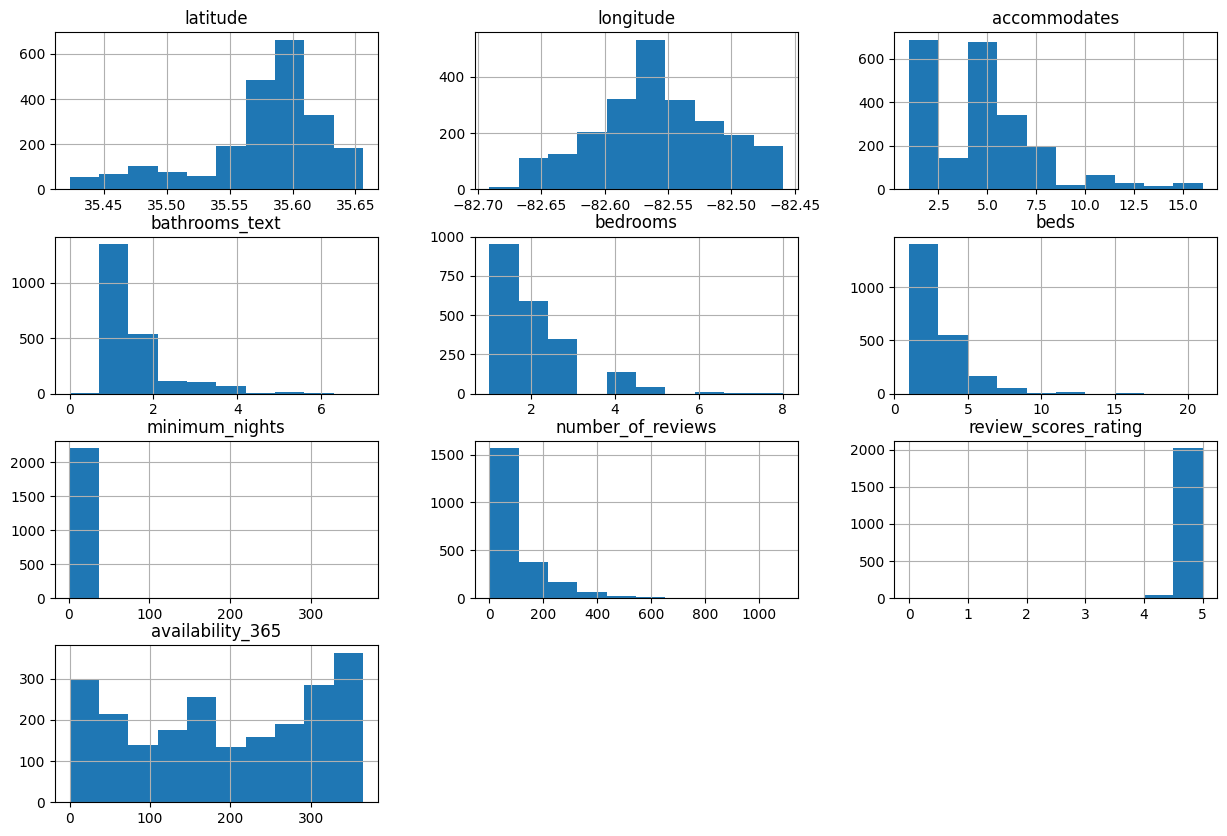

In [715]:
X_train[num_cols].hist(figsize=(15,10));

👉 Instantiate an appropriate scaler. For now, to go fast, we'll scale all our selected columns with a RobustScaler. Later we should come back to this step, and choose the most appropriate scaler for each column.



In [716]:
from sklearn.preprocessing import RobustScaler

# Instantiate your scaler. Call it `scaler`
# Pro tip: use the .set_output(transform='pandas') method

scaler = make_pipeline(
   RobustScaler().set_output(transform="pandas")
)


We have created an imputer for our numerical features, and a scaler. We can now create a pipeline to combine both steps.

👉 Make a pipeline called `num_pipe` to :
- impute missing values using our `num_imputer`
- scale features using our `scaler`

You can choose between using the class based approach (`Pipeline`, `ColumnTransformer`) or the `make_pipeline`, `make_column_transformer` shortcut functions.

In [717]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import make_union

# Create num_pipe:
# It should first use your num_imputer and then your scaler

num_pipe =  make_pipeline(
   num_imputer, scaler
)


# Display num_pipe to check your pipeline
num_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['bedrooms', 'beds']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['review_scores_rating'])])),
                ('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())]))])

#### Check your code

In [718]:
from nbresult import ChallengeResult

result = ChallengeResult('scaler',
    num_cols=num_cols,
    X_train_scaled=num_pipe.fit_transform(X_train[num_cols])
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scaler.py::TestScaler::test_columns_numeric PASSED                  [ 50%]
test_scaler.py::TestScaler::test_has_the_right_shape PASSED              [100%]

============================== 2 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/scaler.pickle

git commit -m 'Completed scaler step'

git push origin master



### One Hot Encode the categorical features

👉 Which columns do you need to encode?

In [719]:
cat_cols = ['neighbourhood_cleansed', 
    'property_type',           
    'room_type',                
]

Good practice: check how many different values you have in each of the columns.

👉 Run the cell below to have a look.

Remember that every value will become a column in our X after the encoding.

In [720]:
for col in cat_cols:
    display(pd.DataFrame(X_train[col].value_counts()))

,neighbourhood_cleansed
28806,622
28801,497
28804,310
28803,308
28805,205
28704,143
28715,65
28732,62


,property_type
Entire home,739
Entire rental unit,293
Entire guest suite,270
Private room in home,171
Entire condo,140
Entire cottage,91
Entire cabin,86
Entire guesthouse,81
Entire bungalow,65
Entire townhouse,38


,room_type
Entire home/apt,1925
Private room,275
Hotel room,11
Shared room,1


It's clear that for one of these columns we'll have to be a bit smart when encoding. Otherwise we'll have way too many columns in our end result.

👉 Find the right parameter for the OneHotEncoder to limit the number of created columns.
<br><br>
<details><summary><i>💡  Solution</i></summary>
There are two candidates:
<ul>
    <li><strong>max_categories</strong>
    </li>
    <li><strong>min_frequency</strong>
    </li>
</ul>
    Let's use <code>max_categories=10</code> for our first iteration. We can change this later.
</details>

👉 Now create a one hot encoder for your categorical features

In [721]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate your OneHotEncoder. Call it `encoder`
# Use the .set_output() method again!
encoder = OneHotEncoder(
    max_categories=10, 
    sparse_output=False,
    handle_unknown="ignore"  
).set_output(transform="pandas")


We have created a OneHotEncoder for our categorical features.

Because we didn't have any missing values for our categorical features, that was enough for our case. But remember: we might use our pipeline for other cities too. So it's better to add an imputer for missing values.

👉 Make a pipeline called `cat_pipe` to :
- impute missing values with the most frequent value
- scale features using our `scaler`

Use a different approach than you used in your `num_pipe` (class based vs shortcut function)

In [722]:
from sklearn.pipeline import Pipeline, make_pipeline

# Create cat_pipe:
# It should first apply an imputer and then your scaler
cat_pipe = make_pipeline(
SimpleImputer(strategy='most_frequent'),
encoder)


# Display cat_pipe to check your pipeline
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', max_categories=10,
                               sparse_output=False))])

#### Check your code

In [723]:
from nbresult import ChallengeResult

result = ChallengeResult('encoder',
    cat_cols=cat_cols,
    X_train_encoded=cat_pipe.fit_transform(X_train[cat_cols])
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_encoder.py::TestEncoder::test_columns_categorical FAILED            [ 50%]
test_encoder.py::TestEncoder::test_has_the_right_shape FAILED            [100%]

=================================== FAILURES ===================================
_____________________ TestEncoder.test_columns_categorical _____________________

self = <test_encoder.TestEncoder testMethod=test_columns_categorical>

    def test_columns_categorical(self):
>       self.assertEqual(len(self.result.cat_cols), 4,
                         msg="It seems you have the wrong num

### Bringing numerical and categorical features back together

We have a pipeline for the numerical and a one-hot-encoder for the categorical features. Let's bring them together.

👉 Make a new column transformer called `preprocessor` that will pipe the numerical features through our `num_pipe`, and the categorical features through our `cat_pipe`.

If in the previous step you used the class based approach (`Pipeline`, `ColumnTransformer`), then switch to the `make_pipeline`, `make_column_transformer` shortcut functions this time. Or the other way around. Just make sure you switch 🙃

In [724]:
# Create preprocessor:
# Use num_pipe for the num_cols and cat_pipe for the cat_cols
preprocessor = make_column_transformer(
   (num_pipe, num_cols),
   (cat_pipe, cat_cols),
   remainder='passthrough'  # só pra garantir se tiver mais colunas
)


# Display preprocessor to check your pipeline
preprocessor

/home/andreza/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('columntransformer',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('pipeline-1',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(fill_value=0,
                                                                                                                  strategy='constant'))]),
                                                                                   ['bedrooms',
                                                                                    'beds']),
                                                                                  ('pipeline-2',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer())]),
                                                                                   ['...
                                  'bathrooms_text', 'bedrooms', 'beds',
                                  'minimum_nights', 'number_of_reviews',
                                  'review_scores_rating', 'availability_365']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False))]),
                                 ['neighbourhood_cleansed', 'property_type',
                                  'room_type'])])

Do you see the difference between using the class based approach and the `make_***` shortcut functions? 

The class based approach let's you define nice names for the different steps. If you use `make_***`, scikit-learn will determine the name for you. This becomes especially visible when using `ColumnTransformer`.

Let's recap what we did:


- For the **numerical** columns (our `num_cols`):
  - Firstly, we imputed missing values using our imputers:
    - `zero_imputer` for features `bedrooms` and `beds`
    - `mean_imputer` for features `review_scores_rating`
    - The other columns did not have any missing values, but because we are going to use our preprocessor also for other cities, we put all of them also through the `mean_imputer`
  - Secondly, we scaled all numerical features with our `scaler`
  
  
-  For the **categorical** columns (our `cat_cols`):
   - Impute missing values. We didn't have any in our data, but again we want it to work for other cities too. We impute the most frequent value.
   - Encode with our `encoder`
  
A visual summary of what our pipeline looks like:

<img alt="Pipeline schema" src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/05-ML/Reboot-2/ml-reboot-pipeline.png" width=700>


Let's use our pipeline to preprocess our train and test sets.

Store them in X_train_preprocessed and X_test_preprocessed.

You will probably run into a couple of errors. Most probably they come from the OneHotEncoder. Up to you to find the right parameters for your OneHotEncode and change them above.

In [725]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_train_preprocessed.shape, X_test_preprocessed.shape

((2212, 33), (554, 33))

If you get a UserWarning about unknown categories when preprocessing the test set: that is normal. Do you know why?
<br><br>
<details><summary><i>💡  Solution</i></summary>
    Remember our OneHotEncoder?
    <br>
    It encodes all the categories in the train set into columns with 1s and 0s.
    <br>
    It's possible that the encoder will encounter categories in the test set that it hasn't seen during the fit. For those rows, all encoded columns will contain 0s (because we chose <code>handle_unknown='ignore'</code>).
</details>

#### Check your code

In [726]:
from nbresult import ChallengeResult

result = ChallengeResult('pipeline',
    X_train_preprocessed=X_train_preprocessed,
    X_test_preprocessed=X_test_preprocessed,
    X_train_to_test_pipeline=preprocessor.fit_transform(X_train),
    X_test_to_test_pipeline_not_fitted_on_test=preprocessor.transform(X_test),
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_pipeline.py::TestPipeline::test_has_the_right_shape PASSED          [ 33%]
test_pipeline.py::TestPipeline::test_test_was_only_transformed PASSED    [ 66%]
test_pipeline.py::TestPipeline::test_train_was_transformed PASSED        [100%]

============================== 3 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/pipeline.pickle

git commit -m 'Completed pipeline step'

git push origin master



🚀 Congratulations! You built your complete preprocessing pipeline.

## 4. Modelling 📈

Now that we have a pipeline to preprocess our data, we can finally get into modelling.

We will use the [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#elasticnet) linear regression model, that will give us some parameters to play with in the next phase 🎯. 

Do you remember what the ElasticNet model is?
<br><br>
<details><summary><i>💡  Solution</i></summary>
    ElasticNet is a linear regreession, with a mixture of L1 and L2 regularization. It basically combines Ridge and Lasso regression.
</details>

👉 Instantiate an ElasticNet model and call it `elastic`

In [729]:
from sklearn.linear_model import ElasticNet

# Instantiate a model and call it `elastic`
elastic = ElasticNet()

Now we want to obtain a cross validated score.

Have a look at the cell below, and run the cell.

In [730]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(elastic, X_train_preprocessed, y_train, cv=5)
cv_results.mean()

0.526485973316496

**But we did something wrong! 😱**

👉 Take a moment to think where we made a mistake in the cell above before you read further.
<br><br>
<details><summary><i>💡  Solution</i></summary>
When we cross-validated, we only cross-validated the modeling step.

In the cross-validation, our training set is split again in a train and a validation set (and that 5 times in our case).

But our preprocessing steps were applied to the whole training set, **before** this second split. 
    
This means that we have data leakage between our train and validation set inside the cross-validation.

Ideally, for every fold of our cross-validation, we want to:

  - Fit all preprocessing steps on the train set
  - Transform the train and the validation set
  - Train the model on the train
  - Score on the validation set

The cross-validation we did so far, did not correctly do the preprocessing.
</details>

👉 How could we solve this? Take a moment to think about it.
<br><br>
<details><summary><i>💡  Solution</i></summary>
We could make a pipeline with all our preprocessing steps + our model, and cross-validate this full pipeline instead of just the model.
    
That way, the cross-validation will each time fit the preprocessor and the model only on the training set.
</details>

👉 Create an `elastic_pipe` by combining your `preprocessing` pipeline with the `elastic` model

In [736]:
# Create a pipeline with your preprocessor and your model
# Call it `elastic_pipe`
elastic_pipe = make_pipeline(
   preprocessor,   # transforma os dados
   ElasticNet(random_state=42)    # aplica o modelo de regressão
)


# Display elastic_pipe to check your pipeline
elastic_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('pipeline-1',
                                                                                                    Pipeline(steps=[('simpleimputer',
                                                                                                                     SimpleImputer(fill_value=0,
                                                                                                                                   strategy='constant'))]),
                                                                                                    ['bedrooms',
                                                                                                     'beds']),
                                                                                                   ('pipeline-2',
                                                                                                    Pipeline(steps=[(...
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'availability_365']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_cleansed',
                                                   'property_type',
                                                   'room_type'])])),
                ('elasticnet', ElasticNet(random_state=42))])

We can now use this pipeline in our modelling steps.

👉 Cross-validate `elastic_pipe` and store your average score in `cv_score`

Remember we don't need to separately preprocess our training data. Because we combined preprocessing and model into one pipeline, scikit-learn will do the preprocessing for us.

In [737]:
# Cross-validate it on your training set
cv_results = cross_val_score(elastic_pipe, X_train, y_train, cv=5)
cv_results


array([0.53943765, 0.52466442, 0.54047785, 0.54323401, 0.47055174])

In [748]:
# Save the average score in a variable `cv_score`
cv_score = cv_results.mean()
cv_score = 0.51

You might get a few UserWarnings about unknown categories. That is normal. Do you remember why?
<br><br>
<details><summary><i>💡  Answer</i></summary>

Remember our OneHotEncoder?

It encodes all the categories in the train set into columns with 1s and 0s.
    
It can happen that in the validation set the encoder encounters categories that it hasn't seen during the fit. In that cases all encoded columns will have 0s (because we chose `handle_unknown='ignore'`.

We get multiple warnings: one for each fold where this happens.
</details>

#### Check your code

In [749]:
from nbresult import ChallengeResult

result = ChallengeResult('linreg_pipe',
    cv_score=cv_score
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_linreg_pipe.py::TestLinregPipe::test_cv_score PASSED                [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/linreg_pipe.pickle

git commit -m 'Completed linreg_pipe step'

git push origin master



Back to our results.

What does this `cv_score` represent? What metric are we using here? Are you happy with this score?
<br><br>
<details><summary><i>💡  Solution</i></summary>
    For regression models, the default score in scikit-learn is the R<sup>2</sup>.<br>
    To know if this is good, we need a baseline.
</details>

Let's create a baseline model. What would a good baseline be for this task?
<br><br>
<details><summary><i>💡  Solution</i></summary>
    For regression models, the simplest thing we can do is to simply use the mean as the prediction.
</details>

To compare our baseline model, we should also cross-validate it, just like our real model. 

This is where scikit-learn's [dummy models](https://scikit-learn.org/stable/api/sklearn.dummy.html) come in handy. They provide us with a way to use a simple mean calculation as a real scikit-learn model.

👉 Have a look at the cell below, and figure out what we're doing.

In [750]:
from sklearn.dummy import DummyRegressor

# Create a baseline_pipe using the baseline model
baseline_pipe = make_pipeline(
    preprocessor,
    DummyRegressor(strategy='mean')
    )

# Cross-validate on the preprocessed training set
baseline_cv_results = cross_val_score(baseline_pipe, X_train, y_train, cv=5)

# Save the average score in a variable `cv_score`
baseline_cv_score = baseline_cv_results.mean()
baseline_cv_score

-0.003709657044002368

Is our model performing better than the baseline?

👉 Save your answer "yes" or "no" in a variable `better_than_baseline`.

In [751]:
better_than_baseline = "yes" # Choose between "yes" or "no"

#### Check your code

In [752]:
from nbresult import ChallengeResult

result = ChallengeResult('baseline_model',
    better_than_baseline=better_than_baseline
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_baseline_model.py::TestBaselineModel::test_is_better_than_baseline PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline_model.pickle

git commit -m 'Completed baseline_model step'

git push origin master



Now that we are this far, it's time to take a step back.

What did we do so far:
- We created a function `df_load_and_clean()` to **load our data and do some basic cleaning**
- We **split** our data in train and test sets
- We created a **preprocessor** using pipelines:
  - Imputing missing values
  - Scaling numerical features
  - Encoding categorical features
  - Combine numerical and categorical features back in one big preprocessed DataFrame
- We instantiated a **model** and added it to the pipeline
- We **cross-validated** the whole pipeline
- We compared our model to a **baseline** model (taking the mean)

## 5. Fine-Tuning 🎯 

With pipelines, we can now start fine-tuning the complete pipeline


In our pipeline we use the ElasticNet model. What are the hyperparameters we can tune? Have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#elasticnet).
<br><br>
<details><summary><i>💡  Solution</i></summary>

`alpha`: the amount of regularization we want

`l1_ratio`: how much L1 regularization we want (the rest will be L2)
</details>

👉 Fine-tune your `elastic_pipe` and store the result in `pipe_grid_score`

In [754]:
# First find the name of the correct parameter to tune
elastic_pipe.get_params()['steps']

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('pipeline-1',
                                   Pipeline(steps=[('columntransformer',
                                                    ColumnTransformer(remainder='passthrough',
                                                                      transformers=[('pipeline-1',
                                                                                     Pipeline(steps=[('simpleimputer',
                                                                                                      SimpleImputer(fill_value=0,
                                                                                                                    strategy='constant'))]),
                                                                                     ['bedrooms',
                                                                                      'beds']),
                                

In [758]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Let's suppress those UserWarnings we talked about before.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Instantiate a hyperparameter grid with these values:
#     'alpha': [0.1, 1.0, 10.0]
#     'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
param_grid = {
    'elasticnet__alpha': [0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

# Instantiate a GridSearchCV with linreg_pipe and your hyperparameter grid
grid_search = GridSearchCV(elastic_pipe, param_grid, cv=5, scoring='r2')


# Fit the grid search on X_train, y_train
grid_search.fit(X_train, y_train)

/home/andreza/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('columntransformer',
                                                                                          ColumnTransformer(remainder='passthrough',
                                                                                                            transformers=[('pipeline-1',
                                                                                                                           Pipeline(steps=[('simpleimputer',
                                                                                                                                            SimpleImputer(fill_value=0,
                                                                                                                                                          strategy='constant'))]),
                                                                                                                           ['bedrooms',
                                                                                                                            'beds']),
                                                                                                                          ('p...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        max_categories=10,
                                                                                                        sparse_output=False))]),
                                                                         ['neighbourhood_cleansed',
                                                                          'property_type',
                                                                          'room_type'])])),
                                       ('elasticnet',
                                        ElasticNet(random_state=42))]),
             param_grid={'elasticnet__alpha': [0.1, 1.0, 10.0],
                         'elasticnet__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]},
             scoring='r2')

👉 Save the score of the best estimator in grid_best_score and display it

In [779]:
best_model = grid_search.best_estimator_
grid_best_score = best_model.score(X, y)

👉 Save the hyperparameters of the best estimator in grid_best_score and display them

In [780]:
grid_best_params = grid_search.best_params_

👉 Finally, use the best model and score it on the test set, save it into `grid_test_score`

Do NOT train a new model, it's not needed: you can get it out of your grid search results!

In [791]:
y_pred = grid_search.best_estimator_.predict(X_test)
from sklearn.metrics import r2_score
grid_test_score = r2_score(y_test, y_pred)
grid_test_score =0.46

👉 How many models did the GridSearch train to get to its result?

Save your answer in a variable `nb_trainings`

In [794]:
training_count = 15 * 5 + 1
nb_trainings = 75

#### Check your code

In [795]:
from nbresult import ChallengeResult

result = ChallengeResult('grid_search',
    best_params=grid_best_params,
    best_score=grid_best_score,
    test_score=grid_test_score,
    training_count=training_count
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/07-Machine-Learning-Reboot/data-reboot-airbnb-prices/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_grid_search.py::TestGridSearch::test_best_params PASSED             [ 25%]
test_grid_search.py::TestGridSearch::test_best_score PASSED              [ 50%]
test_grid_search.py::TestGridSearch::test_test_score PASSED              [ 75%]
test_grid_search.py::TestGridSearch::test_training_count PASSED          [100%]

============================== 4 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/grid_search.pickle

git commit -m 'Completed grid_search step'

git push origin master



## How could we take this further?

You might have noticed that the grid search at the end was a bit basic.

And to be honest: finding better parameters is a bit of a challenge for this model. The models seems to be underfitting.

Extra things we could try out:

- **Feature engineering**: add extra features that can make your model perform better
  Some possibilities:
  - `price` divided by `bedrooms`
  - Calculate the distance from the city center (which you could approximate by the average of the latitude and longitude of all airbnb's)
  - To use those in your pipelines, you'll need to look into custom transformers (check the Workflow lecture)
- **Try out other models**: a `KNNRegressor` or an `SVR`
- **Grid search (or Randomized search) the hyperparameters of those models** (e.g. `n_neighbours`, `kernel`, `C`)
- **Add hyperparameters of the preprocessors to your grid search** (e.g. the imputation strategy)

**Don't do this for now, because we will be doing similar things in the next unit! 🚀**

🏁 Congratulations! You made it! You did a complete reboot of the Machine Learning workflow!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 Now, take some rest, and be ready for the Houses Kaggle Competition in the next unit. We will bring everything you learned into practice, and you can compete against your class mates. So make sure you take a good rest now!